# Your Title Here

**Name(s)**: Lauren May and Julia Rehring

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

ModuleNotFoundError: No module named 'lec_utils'

## Step 1: Introduction

In [ ]:
outages = pd.read_excel('outage.xlsx', skiprows=[0,1,2,3,4,6], usecols=lambda x: x not in ['variables', 'OBS'])
outages

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011,7.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
1,2014,5.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
2,2010,10.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
3,2012,6.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
4,2015,7.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
5,2010,11.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
6,2010,7.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
7,2005,6.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
8,2015,3.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
9,2013,6.0,Minnesota,MN,...,0.60,91.59,8.41,5.48


## Step 2: Data Cleaning and Exploratory Data Analysis

In [2]:
outages['OUTAGE.START.TIME'] = pd.to_timedelta(outages['OUTAGE.START.TIME'].astype(str))
outages['OUTAGE.START'] = outages['OUTAGE.START.DATE'] + outages['OUTAGE.START.TIME']
outages.drop(columns=['OUTAGE.START.DATE', 'OUTAGE.START.TIME'], inplace=True)

outages['OUTAGE.RESTORATION.TIME'] = pd.to_timedelta(outages['OUTAGE.RESTORATION.TIME'].astype(str))
outages['OUTAGE.RESTORATION'] = outages['OUTAGE.RESTORATION.DATE'] + outages['OUTAGE.RESTORATION.TIME']
outages.drop(columns=['OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], inplace=True)

NameError: name 'outages' is not defined

In [120]:
outages = outages.dropna(subset=['MONTH', 'OUTAGE.DURATION'])

In [121]:
outages = outages[outages['OUTAGE.DURATION'] < 40_000]

In [122]:
nan_counts = outages.isna().sum()
print(nan_counts)

YEAR                        0
MONTH                       0
U.S._STATE                  0
POSTAL.CODE                 0
NERC.REGION                 0
CLIMATE.REGION              5
ANOMALY.LEVEL               0
CLIMATE.CATEGORY            0
CAUSE.CATEGORY              0
CAUSE.CATEGORY.DETAIL     447
HURRICANE.NAMES          1398
OUTAGE.DURATION             0
DEMAND.LOSS.MW            669
CUSTOMERS.AFFECTED        415
RES.PRICE                  12
COM.PRICE                  12
IND.PRICE                  12
TOTAL.PRICE                12
RES.SALES                  12
COM.SALES                  12
IND.SALES                  12
TOTAL.SALES                12
RES.PERCEN                 12
COM.PERCEN                 12
IND.PERCEN                 12
RES.CUSTOMERS               0
COM.CUSTOMERS               0
IND.CUSTOMERS               0
TOTAL.CUSTOMERS             0
RES.CUST.PCT                0
COM.CUST.PCT                0
IND.CUST.PCT                0
PC.REALGSP.STATE            0
PC.REALGSP

In [123]:
outages['CAUSE.CATEGORY'].value_counts()
outages_grouped = outages.groupby("CAUSE.CATEGORY", as_index=False).agg({
    "OUTAGE.DURATION": "mean",
    "CUSTOMERS.AFFECTED": "sum"
})
outages_grouped

,CAUSE.CATEGORY,OUTAGE.DURATION,CUSTOMERS.AFFECTED
0,equipment failure,399.13,2.84e+06
1,fuel supply emergency,8395.23,1.00e+00
2,intentional attack,429.98,3.56e+05
3,islanding,200.55,2.10e+05
4,public appeal,1468.45,1.60e+05
5,severe weather,3704.41,1.32e+08
6,system operability disruption,728.87,1.71e+07


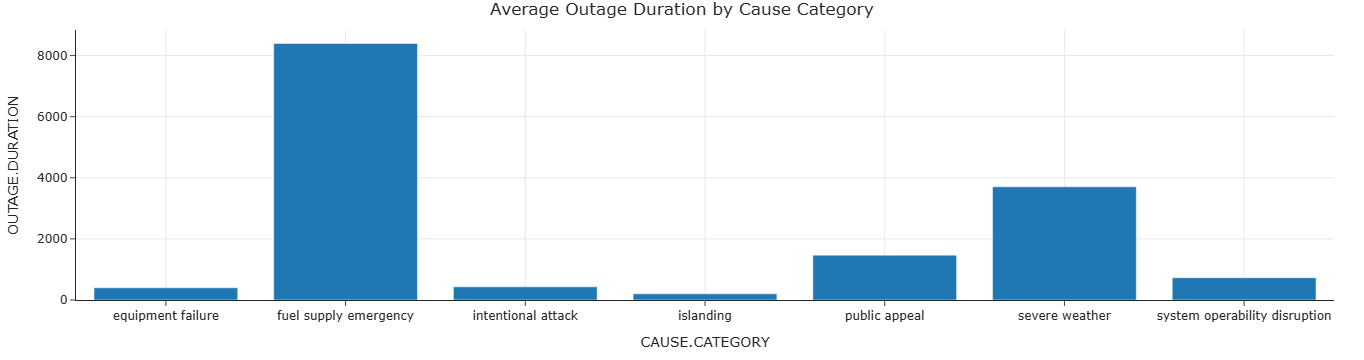

In [124]:
fig1 = px.bar(
    outages_grouped, 
    x="CAUSE.CATEGORY", 
    y="OUTAGE.DURATION", 
    title="Average Outage Duration by Cause Category"
)
fig1.show()

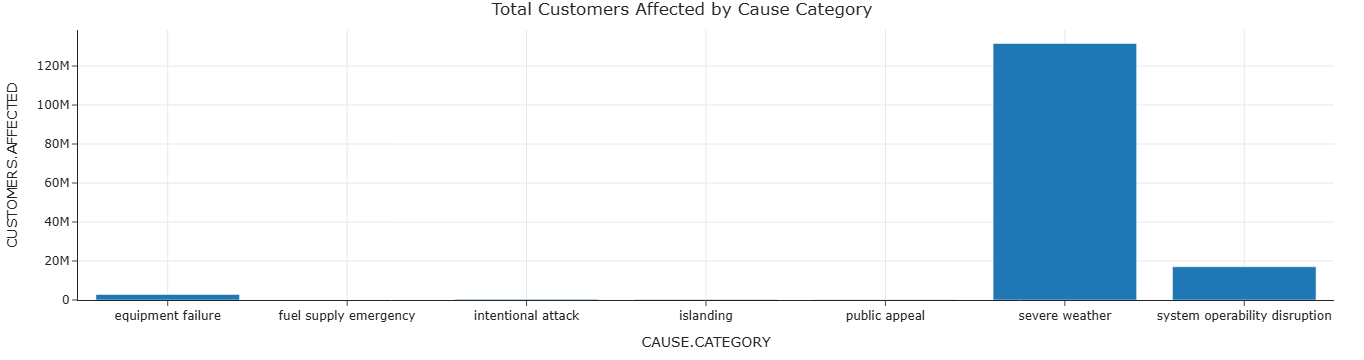

In [125]:
fig2 = px.bar(
    outages_grouped, 
    x="CAUSE.CATEGORY", 
    y="CUSTOMERS.AFFECTED", 
    title="Total Customers Affected by Cause Category"
)
fig2.show()

## Step 3: Framing a Prediction Problem

In [126]:
# TODO

## Step 4: Baseline Model

In [127]:
outages['CAUSE.CATEGORY'].nunique()

7

In [202]:
# linear regression with cause category (OHE), month (OHE), and climate region (OHE)
from sklearn.pipeline import make_pipeline, FunctionTransformer, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = outages[['MONTH', 'CLIMATE.REGION', 'ANOMALY.LEVEL']]
duration = outages['OUTAGE.DURATION']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(features, duration, random_state=42)

absolute_anomaly = FunctionTransformer(lambda s: np.abs(s))

# OHE ['MONTH', 'CLIMATE.REGION', 'CAUSE.CATEGORY']
preprocessing = make_column_transformer(
    (OneHotEncoder(drop='first'), ['MONTH', 'CLIMATE.REGION']),
    (absolute_anomaly, ['ANOMALY.LEVEL'])
)
model = make_pipeline(
    preprocessing,
    LinearRegression()
)

model.fit(X_train, y_train)

model.predict(pd.DataFrame({
    'MONTH': [7],
    'CLIMATE.REGION': 'Central',
    'ANOMALY.LEVEL': 0.7
}))

array([1538.93])

In [203]:
# training MSE
pt4_mse_train = mean_squared_error(y_train, model.predict(X_train))

# validation MSE
pt4_mse_test = mean_squared_error(y_test, model.predict(X_test))

# validation MAE
pt4_mae_test = mean_absolute_error(y_test, model.predict(X_test))

## Step 5: Final Model

In [207]:
# add grid search for polynomial features, compare Linear, Ridge, and LASSO
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

X_train = outages[['MONTH', 'CLIMATE.REGION', 'CAUSE.CATEGORY', 'CLIMATE.CATEGORY', 'ANOMALY.LEVEL', 'POPPCT_URBAN']]
y_train = outages['OUTAGE.DURATION']

# splitting into columns for transformer
poly_column = ['ANOMALY.LEVEL']
other_columns = [col for col in X_train.columns if col not in poly_column]

preprocessor = ColumnTransformer(transformers=[
    ('poly', Pipeline([
        ('poly_features', PolynomialFeatures(include_bias=False))
    ]), poly_column),
    ('other', OneHotEncoder(drop='first'), other_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge()) 
])

param_grid = {
    'preprocessor__poly__poly_features__degree': range(1, 26),
    'regressor__alpha': [0.1, 1.0, 10.0]
}
model_ridge = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
model_ridge.fit(X_train, y_train)

print("Best parameters:", model_ridge.best_params_)
print("Best MSE:", -model_ridge.best_score_)

Best parameters: {'preprocessor__poly__poly_features__degree': 1, 'regressor__alpha': 0.1}
Best MSE: nan


In [208]:
# training MSE
pipe_mse_train = mean_squared_error(y_train, model_ridge.predict(X_train))

# validation MSE
pipe_mse_test = mean_squared_error(y_test, model_ridge.predict(X_test))

# validation MAE
pipe_mae_test = mean_absolute_error(y_test, model_ridge.predict(X_test))

In [209]:
# linear regression with more features
from sklearn.pipeline import make_pipeline, FunctionTransformer, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = outages[['MONTH', 'CLIMATE.REGION', 'CAUSE.CATEGORY', 'CLIMATE.CATEGORY', 'ANOMALY.LEVEL', 'POPPCT_URBAN']]
duration = outages['OUTAGE.DURATION']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(features, duration, random_state=42)

absolute_anomaly = FunctionTransformer(lambda s: np.abs(s))

# OHE ['MONTH', 'CLIMATE.REGION', 'CAUSE.CATEGORY', 'CLIMATE.CATEGORY']
preprocessing = make_column_transformer(
    (OneHotEncoder(drop='first'), ['MONTH', 'CLIMATE.REGION', 'CAUSE.CATEGORY', 'CLIMATE.CATEGORY']),
    (StandardScaler(), ['POPPCT_URBAN']),
    (absolute_anomaly, ['ANOMALY.LEVEL'])
)
model_5 = make_pipeline(
    preprocessing,
    LinearRegression()
)

model_5.fit(X_train, y_train)

model_5.predict(pd.DataFrame({
    'MONTH': [7],
    'CLIMATE.REGION': 'Central',
    'CAUSE.CATEGORY': 'severe weather',
    'ANOMALY.LEVEL': 1.1,
    'CLIMATE.CATEGORY': 'cold',
    'POPPCT_URBAN': 70
}))

array([1386.35])

In [210]:
# training MSE
pt5_mse_train = mean_squared_error(y_train, model_5.predict(X_train))

# validation MSE
pt5_mse_test = mean_squared_error(y_test, model_5.predict(X_test))

# validation MAE
pt5_mae_test = mean_absolute_error(y_test, model_5.predict(X_test))

In [211]:
results_data = {
                'Training MSE': [pt4_mse_train, pt5_mse_train, pipe_mse_train], 
                'Testing MSE': [pt4_mse_test, pt5_mse_test, pipe_mse_test], 
                'Testing MAE': [pt4_mae_test, pt5_mae_test, pipe_mae_test]
               }
results_df = pd.DataFrame(results_data, index = ['Part 4', 'Part 5', 'Pipeline'])
results_df

,Training MSE,Testing MSE,Testing MAE
Part 4,1.49e+07,1.27e+07,2404.05
Part 5,1.21e+07,1.00e+07,2166.86
Pipeline,1.07e+07,9.03e+06,1997.37
